In [1]:
import time
import re
import os
from typing import List, Dict
import hashlib
import traceback

In [2]:
cache_dir = '.requests_cache'
hash_prefix_length = 2

In [3]:
class TermColor:
    PURPLE = '\033[95m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    ENDC = '\033[0m'


class Encoding:
    UTF8 = 'utf-8'
    UTF8_WITH_BOM = 'utf-8-sig'
    UTF16 = 'utf-16'
    GB2312 = 'gb2312'
    SHIFT_JIS = 'shift-jis'

    @classmethod
    def decode(cls, bs: bytes):
        try:
            encoding = cls.UTF8_WITH_BOM
            decoded_content = bs.decode(encoding)
            return encoding, decoded_content
        except Exception as ex:
            # traceback.print_exc()
            pass

        try:
            encoding = cls.UTF8
            decoded_content = bs.decode(encoding)
            return encoding, decoded_content
        except Exception as ex:
            # traceback.print_exc()
            pass

        try:
            encoding = cls.UTF16
            decoded_content = bs.decode(encoding)
            return encoding, decoded_content
        except Exception as ex:
            # traceback.print_exc()
            pass

        try:
            encoding = cls.GB2312
            decoded_content = bs.decode(encoding)
            return encoding, decoded_content
        except Exception as ex:
            # traceback.print_exc()
            pass

        try:
            encoding = cls.SHIFT_JIS
            decoded_content = bs.decode(encoding)
            return encoding, decoded_content
        except Exception as ex:
            # traceback.print_exc()
            pass

        return None, bs

In [4]:
def hash_url(url: str):
    hash_str = hashlib.md5(url.encode('utf-8')).hexdigest()
    hash_str = hash_str.lower()
    return hash_str


def get_hash_file_location(hash_str: str):
    hash_prefix = hash_str[:hash_prefix_length]

    sub_cache_dir = os.path.join(cache_dir, hash_prefix)
    cache_file = os.path.join(sub_cache_dir, hash_str)

    return cache_file, sub_cache_dir

In [5]:
def get_response_from_cache(url: str):
    url_hash = hash_url(url)

    cache_file, sub_cache_dir = get_hash_file_location(url_hash)

    if os.path.exists(cache_file):
        content = open(cache_file, mode='rb').read()
        return content

In [6]:
content_bs = get_response_from_cache('http://www.7723.cn/download/10172.htm')
type(content_bs)

bytes

In [7]:
len(content_bs)

23152

In [10]:
_, html_str = Encoding.decode(content_bs)
len(html_str)

20187

In [ ]:
html_str

In [ ]:
file_list = os.listdir('.')
file_list

In [13]:
url_list_part_file_path = []
url_list_part_file_path

[]

In [ ]:
for fn in file_list:
    if 'url_list_part' in fn:
        url_list_part_file_path.append(fn)
url_list_part_file_path

In [26]:
url_line_list = []
url_line_list

[]

In [25]:
import json

In [27]:
for fpath in url_list_part_file_path:
    content_bs = open(fpath, mode='rb').read()
    url_list = json.loads(content_bs)
    url_line_list.extend(url_list)
#     _, content_str = Encoding.decode(content_bs)
#     line_list = content_str.splitlines(False)
#     # filter empty line
#     for line in line_list:
#         line = line.strip()
#         if len(line) > 0:
#             url_line_list.append(line)
len(url_line_list)

182557

In [28]:
url_line_list.sort()

In [ ]:
url_line_list[0:40]

In [31]:
sample_url = url_line_list[0]
sample_url

'http://image.7723.cn/ 101-TRIAL- | 278'

In [32]:
response_bs = get_response_from_cache(sample_url)
type(response_bs)

bytes

In [33]:
len(response_bs)

0

In [34]:
url_index = 0
url_index

0

In [35]:
number_of_urls = len(url_line_list)
number_of_urls

182557

In [38]:
from tqdm import tqdm

In [39]:
for url_index in tqdm(range(number_of_urls)):
    entry_url = url_line_list[url_index]
    response_bs = get_response_from_cache(entry_url)
    if response_bs is None:
        print(f'{entry_url} response is not in cache')
    else:
        if len(response_bs) > 0:
            print(url_index, entry_url)
            break

  3%|█▉                                                                        | 4784/182557 [00:02<01:41, 1745.78it/s]

4784 http://image.7723.cn/attachments/icons/1/37171396590141.jpg


In [43]:
import PIL
import PIL.Image
import io

In [41]:
len(response_bs)

11054

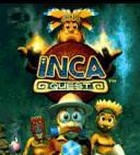

In [44]:
pil_image = PIL.Image.open(io.BytesIO(response_bs))
pil_image

# start parsing

In [45]:
sample_game_page_url = 'http://www.7723.cn/download/10420.htm'
sample_game_page_url

'http://www.7723.cn/download/10420.htm'

# game id

In [57]:
import urllib
import urllib.parse

In [58]:
parse_result = urllib.parse.urlparse(sample_game_page_url)
parse_result

ParseResult(scheme='http', netloc='www.7723.cn', path='/download/10420.htm', params='', query='', fragment='')

In [60]:
path_part_list = parse_result.path.split('/')
path_part_list

['', 'download', '10420.htm']

In [61]:
game_id = os.path.splitext(path_part_list[-1])[0]
game_id

'10420'

# parse html

In [46]:
content_bs = get_response_from_cache(sample_game_page_url)
type(content_bs)

bytes

In [47]:
# TODO check for None and 0 size response
len(content_bs)

22255

In [48]:
_, html_str = Encoding.decode(content_bs)
len(html_str)

19201

In [49]:
import bs4

In [50]:
soup = bs4.BeautifulSoup(html_str)

In [51]:
filename = 'game_page_prettified.html'
prettified_html_str = soup.prettify()
with open(filename, mode='wb') as outfile:
    outfile.write(prettified_html_str.encode('utf-8'))

# game title/name

In [55]:
title_element_list = soup.select('#content .title h3')
title_element_list

[<h3>苍弓默示录－吞噬时空</h3>,
 <h3>游戏简介</h3>,
 <h3>游戏截图</h3>,
 <h3>游戏下载</h3>,
 <h3>手机用户评论<span>( 请用手机登陆 wap.7723.cn 发表游戏评论与网友分享游戏心得。)</span></h3>]

In [56]:
# TODO check len of result
game_name = title_element_list[0].text
game_name

'苍弓默示录－吞噬时空'

# game banner and game play images

In [63]:
img_list = soup.select('#content ul.container img')
img_list

[<img alt="苍弓默示录－吞噬时空" height="80" src="http://image.7723.cn/wuza/pico/2011111O8007024.jpg" width="120"/>,
 <img alt="苍弓默示录－吞噬时空" height="208" src="http://images.7723.cn/wuza/pico/2011111O800703.jpg" width="172"/>,
 <img alt="苍弓默示录－吞噬时空" height="208" src="http://images.7723.cn/wuza/pico/2011111O8037376.jpg" width="172"/>,
 <img alt="苍弓默示录－吞噬时空" height="208" src="http://images.7723.cn/wuza/pico/2011111O8037478.jpg" width="172"/>,
 <img alt="苍弓默示录－吞噬时空" height="208" src="http://images.7723.cn/wuza/pico/2011111O8037431.jpg" width="172"/>,
 <img alt="苍弓默示录－吞噬时空" height="208" src="http://images.7723.cn/wuza/pico/2011111O8037492.jpg" width="172"/>,
 <img alt="苍弓默示录－吞噬时空" height="208" src="http://images.7723.cn/wuza/pico/2011111O8037477.jpg" width="172"/>]

In [65]:
img_url_list = [x.attrs['src'] for x in img_list]
img_url_list

['http://image.7723.cn/wuza/pico/2011111O8007024.jpg',
 'http://images.7723.cn/wuza/pico/2011111O800703.jpg',
 'http://images.7723.cn/wuza/pico/2011111O8037376.jpg',
 'http://images.7723.cn/wuza/pico/2011111O8037478.jpg',
 'http://images.7723.cn/wuza/pico/2011111O8037431.jpg',
 'http://images.7723.cn/wuza/pico/2011111O8037492.jpg',
 'http://images.7723.cn/wuza/pico/2011111O8037477.jpg']

In [66]:
banner_image_url = img_url_list[0]
banner_image_url

'http://image.7723.cn/wuza/pico/2011111O8007024.jpg'

In [67]:
game_play_image_url_list = img_url_list[1:]
game_play_image_url_list

['http://images.7723.cn/wuza/pico/2011111O800703.jpg',
 'http://images.7723.cn/wuza/pico/2011111O8037376.jpg',
 'http://images.7723.cn/wuza/pico/2011111O8037478.jpg',
 'http://images.7723.cn/wuza/pico/2011111O8037431.jpg',
 'http://images.7723.cn/wuza/pico/2011111O8037492.jpg',
 'http://images.7723.cn/wuza/pico/2011111O8037477.jpg']

# game binaries

In [73]:
container_element_list = li_element_list = soup.select('#content ul.container')
len(container_element_list)

3

In [75]:
# TODO check len
li_element_list = container_element_list[2].select('li')
len(li_element_list)

16

In [76]:
li_element_list[0]

<li>
<h3><a href="http://www.7723.cn/downb.asp?idd=5&amp;id=10420&amp;ksp=1" target="_blank">点击下载[jar] 883K</a></h3>
<p>诺基亚 N70系列(176×208)<br/>7610 3230 6600 6260 6620 6630 6670 6680 6681 6682 N70 N72 ;松下: X700 X800 ;联想: P930<br/></p>
</li>

In [77]:
li_element_list

[<li>
 <h3><a href="http://www.7723.cn/downb.asp?idd=5&amp;id=10420&amp;ksp=1" target="_blank">点击下载[jar] 883K</a></h3>
 <p>诺基亚 N70系列(176×208)<br/>7610 3230 6600 6260 6620 6630 6670 6680 6681 6682 N70 N72 ;松下: X700 X800 ;联想: P930<br/></p>
 </li>,
 <li>
 <h3><a href="http://www.7723.cn/downb.asp?idd=5&amp;id=10420&amp;ksp=2" target="_blank">点击下载[jar] 1,281K</a></h3>
 <p>诺基亚 N73系列(240×320)<br/>N73 5320 5320XM 5320di_XM 5630XM 5700 5700XM 5710XM 5730XM 6110 6110N 6120 6120C 6120ci 6121 6122C 6124C 6210S 6210ci 6220C 6290 6650F 6700S 6702S 6710N 6720C 6730c 6788 6788I 6790 C5 C5-01 E101 E50 E51 E52 E55 E65 E66 E75 X5-00 X5-01 N71 N73ie N75 N76 N76-1 N77 N78 N79 N79 Eco N81 N81 8GB N82 N85 N86 N92 N93 N93I N95 N958G N95 8GB N95-3 NAM N96<br/></p>
 </li>,
 <li>
 <h3><a href="http://www.7723.cn/downb.asp?idd=5&amp;id=10420&amp;ksp=3" target="_blank">点击下载[jar] 913K</a></h3>
 <p>诺基亚 N7370系列(240×320)<br/>7370 2700C 2710C 2710N 2730C 3120C 3208C 3600S 3602S 3610A 3610F 3620 3710F 3711 3720C 3806 5

In [78]:
li_element = li_element_list[0]
li_element

<li>
<h3><a href="http://www.7723.cn/downb.asp?idd=5&amp;id=10420&amp;ksp=1" target="_blank">点击下载[jar] 883K</a></h3>
<p>诺基亚 N70系列(176×208)<br/>7610 3230 6600 6260 6620 6630 6670 6680 6681 6682 N70 N72 ;松下: X700 X800 ;联想: P930<br/></p>
</li>

In [85]:
li_element.select_one('a').attrs['href']

'http://www.7723.cn/downb.asp?idd=5&id=10420&ksp=1'

In [86]:
# TODO replace br with new line
description_element = li_element.select_one('p')
description_element

<p>诺基亚 N70系列(176×208)<br/>7610 3230 6600 6260 6620 6630 6670 6680 6681 6682 N70 N72 ;松下: X700 X800 ;联想: P930<br/></p>

In [89]:
description_text = description_element.get_text('\n')
print(description_text)

诺基亚 N70系列(176×208)
7610 3230 6600 6260 6620 6630 6670 6680 6681 6682 N70 N72 ;松下: X700 X800 ;联想: P930


In [90]:
def is_game_page_url(url: str):
    parse_result = urllib.parse.urlparse(url)
    path_parts = parse_result.path.split('/')
    # filter out empty strings
    path_parts = [part for part in path_parts if part]
    if len(path_parts) != 2:
        return False

    if path_parts[0] != 'download':
        return False

    if not path_parts[1].endswith('.htm'):
        return False

    return True

In [91]:
def parse_game_page_url(url: str):
    if not is_game_page_url(url):
        raise Exception(f'Not a game page url {url}')

    content_bs = get_response_from_cache(url)
    if (content_bs is None) or (len(content_bs) == 0):
        raise Exception(f'Could not get response from cache for {url}')

    _, html_str = Encoding.decode(content_bs)

    game_page_obj = {
        'url': url,
    }

    soup = bs4.BeautifulSoup(html_str)
    ####################################################################
    title_element_list = soup.select('#content .title h3')
    if len(title_element_list) > 1:
        game_name = title_element_list[0].text
        game_page_obj['name'] = game_name
    ####################################################################
    img_element_list = soup.select('#content ul.container img')
    img_url_list = []
    for img_element in img_element_list:
        if 'src' in img_element.attrs:
            img_url_list.append(img_element.attrs['src'])

    if len(img_url_list) > 0:
        game_page_obj['banner_image'] = {
            'url': img_url_list[0],
        }

        gameplay_image_info_list = []
        for img_url in img_url_list:
            gameplay_image_info_list.append({
                'url': img_url,
            })

        game_page_obj['gameplay_image_list'] = gameplay_image_info_list
    ####################################################################
    container_element_list = soup.select('#content ul.container')
    if len(container_element_list) > 3:
        li_element_list = container_element_list[2].select('li')

        game_binary_info_list = []
        for li_element in li_element_list:
            anchor_element = li_element.select_one('a')
            if anchor_element is None:
                continue

            if 'href' not in anchor_element.attrs:
                continue

            download_url = anchor_element.attrs['href']
            game_binary_info = {
                'url': download_url,
            }
            description_element = li_element.select_one('p')
            if description_element is not None:
                description_text = description_element.get_text('\n')
                game_binary_info['description'] = description_text

            game_binary_info_list.append(game_binary_info)

        game_page_obj['binary_info_list'] = game_binary_info_list
    ####################################################################
    return game_page_obj

In [92]:
len(url_line_list)

182557

In [93]:
game_page_url_list = []
game_page_url_list

[]

In [94]:
for url_str in url_line_list:
    if is_game_page_url(url_str):
        game_page_url_list.append(url_str)
len(game_page_url_list)

0

In [95]:
genre_first_page_urls = [
    'http://www.7723.cn/zuixin/jiaose_1.htm', # 角色扮演 # RPG
    'http://www.7723.cn/zuixin/yizhi_1.htm', # 益智游戏 # Puzzle games
    'http://www.7723.cn/zuixin/dongzuo_1.htm', # 动作游戏 # Action games
    'http://www.7723.cn/zuixin/saiche_1.htm', # 赛车游戏 # Racing games
    'http://www.7723.cn/zuixin/maoxian_1.htm', # 冒险游戏 # Adventure games
    'http://www.7723.cn/zuixin/yangcheng_1.htm', # 养成游戏 # Dating sim?
    'http://www.7723.cn/zuixin/tiyu_1.htm', # 体育游戏 # Sports games
    'http://www.7723.cn/zuixin/gedou_1.htm', # 格斗游戏 # Fighting games
    'http://www.7723.cn/zuixin/qipai_1.htm', # 棋牌游戏 # Board games
    'http://www.7723.cn/zuixin/celue_1.htm', # 策略游戏 # Strategy games
    'http://www.7723.cn/zuixin/sheji_1.htm', # 射击游戏 # Shooting games
    'http://www.7723.cn/zuixin/moni_1.htm', # 模拟经营 # Simulation (city building, shop management, etc.)
    'http://www.7723.cn/zuixin/feixing_1.htm', # 飞行游戏 # Flying (e.g. space ship) games
    'http://www.7723.cn/zuixin/wangyou_1.htm', # 手机网游 # online games
]

genre_first_page_urls

['http://www.7723.cn/zuixin/jiaose_1.htm',
 'http://www.7723.cn/zuixin/yizhi_1.htm',
 'http://www.7723.cn/zuixin/dongzuo_1.htm',
 'http://www.7723.cn/zuixin/saiche_1.htm',
 'http://www.7723.cn/zuixin/maoxian_1.htm',
 'http://www.7723.cn/zuixin/yangcheng_1.htm',
 'http://www.7723.cn/zuixin/tiyu_1.htm',
 'http://www.7723.cn/zuixin/gedou_1.htm',
 'http://www.7723.cn/zuixin/qipai_1.htm',
 'http://www.7723.cn/zuixin/celue_1.htm',
 'http://www.7723.cn/zuixin/sheji_1.htm',
 'http://www.7723.cn/zuixin/moni_1.htm',
 'http://www.7723.cn/zuixin/feixing_1.htm',
 'http://www.7723.cn/zuixin/wangyou_1.htm']